In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline
np.random.seed(5)

pd.set_option('max_columns', 500)
pd.set_option('max_rows', 500)
pd.set_option('max_colwidth', 500)

: 

: 

: 

: 

In [359]:
# import the data

train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
vd = pd.read_csv('Variable Definitions.csv')
submit = pd.read_csv('SampleSubmission.csv')

In [360]:
train.head(10)

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,30921,49,1,2,105,220,1,1,195,1,1.0,1,2,3,1
1,73128,29,1,0,160,180,0,2,198,0,6.0,2,1,0,1
2,45328,46,1,2,115,131,1,2,125,1,2.3,0,0,0,1
3,67372,41,1,2,161,454,1,2,159,1,3.5,2,4,0,1
4,41642,57,1,3,129,277,0,1,80,0,5.6,0,2,0,0
5,86274,69,1,2,137,233,1,2,131,1,0.9,0,2,2,1
6,13300,39,0,1,184,491,0,1,108,0,2.3,1,4,3,0
7,46752,36,1,1,117,442,0,0,201,0,5.1,0,1,3,1
8,74652,58,1,0,146,248,0,2,111,1,4.6,0,4,2,1
9,63599,40,1,1,107,278,0,2,106,1,4.2,1,3,0,1


In [ ]:
test.head()

In [361]:
test.head(10)

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,37677,59,1,3,98,185,0,1,110,0,2.9,2,0,1,0
1,27603,69,0,3,193,318,1,1,104,0,3.3,1,1,3,0
2,66786,75,1,2,99,546,1,1,190,0,1.5,0,0,1,0
3,45438,51,1,0,156,247,0,0,162,1,5.5,2,2,1,1
4,73200,50,1,3,136,333,0,2,86,1,0.2,1,3,1,1
5,69589,75,0,3,152,286,1,1,127,1,0.3,1,3,2,1
6,61343,72,0,2,97,174,0,0,113,0,5.0,0,0,3,1
7,57277,60,0,2,159,232,1,0,174,1,3.9,0,3,3,1
8,15007,71,0,1,100,477,0,2,179,0,3.6,1,3,2,1
9,81389,32,0,0,162,229,1,1,187,1,1.6,0,2,0,1


In [362]:
vd.head(100)

,Variable defination
0,age
1,sex
2,chest pain type (4 values)
3,resting blood pressure
4,serum cholestoral in mg/dl
5,fasting blood sugar > 120 mg/dl
6,"resting electrocardiographic results (values 0,1,2)"
7,maximum heart rate achieved
8,exercise induced angina
9,oldpeak = ST depression induced by exercise relative to rest


In [363]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7087 entries, 0 to 7086
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        7087 non-null   int64  
 1   age       7087 non-null   int64  
 2   sex       7087 non-null   int64  
 3   cp        7087 non-null   int64  
 4   trestbps  7087 non-null   int64  
 5   chol      7087 non-null   int64  
 6   fbs       7087 non-null   int64  
 7   restecg   7087 non-null   int64  
 8   thalach   7087 non-null   int64  
 9   exang     7087 non-null   int64  
 10  oldpeak   7087 non-null   float64
 11  slope     7087 non-null   int64  
 12  ca        7087 non-null   int64  
 13  thal      7087 non-null   int64  
 14  target    7087 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 830.6 KB


In [364]:
train.describe()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,7087.000000,7087.000000,7087.000000,7087.000000,7087.000000,7087.000000,7087.000000,7087.000000,7087.000000,7087.000000,7087.000000,7087.000000,7087.000000,7087.000000,7087.000000
mean,50520.455341,53.161987,0.498660,1.511923,147.749259,343.852265,0.499365,1.011006,136.083251,0.500494,3.126556,0.995485,2.023705,1.496402,0.811486
std,23091.461196,14.217069,0.500033,1.118239,31.019531,127.795534,0.500035,0.816595,38.022627,0.500035,1.784760,0.817175,1.411018,1.118296,0.391150
min,10019.000000,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30629.000000,41.000000,0.000000,1.000000,121.000000,231.000000,0.000000,0.000000,103.000000,0.000000,1.600000,0.000000,1.000000,0.000000,1.000000
50%,50872.000000,53.000000,0.000000,2.000000,148.000000,344.000000,0.000000,1.000000,136.000000,1.000000,3.100000,1.000000,2.000000,1.000000,1.000000
75%,70511.000000,66.000000,1.000000,3.000000,175.000000,453.000000,1.000000,2.000000,169.000000,1.000000,4.700000,2.000000,3.000000,2.000000,1.000000
max,89991.000000,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [365]:
train['target'].value_counts()

1    5751
0    1336
Name: target, dtype: int64

In [366]:
test.shape

(2913, 15)

In [367]:
submit.shape

(2913, 2)

In [368]:
train.isna().sum()

id          0
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [369]:
train.duplicated().sum()

0

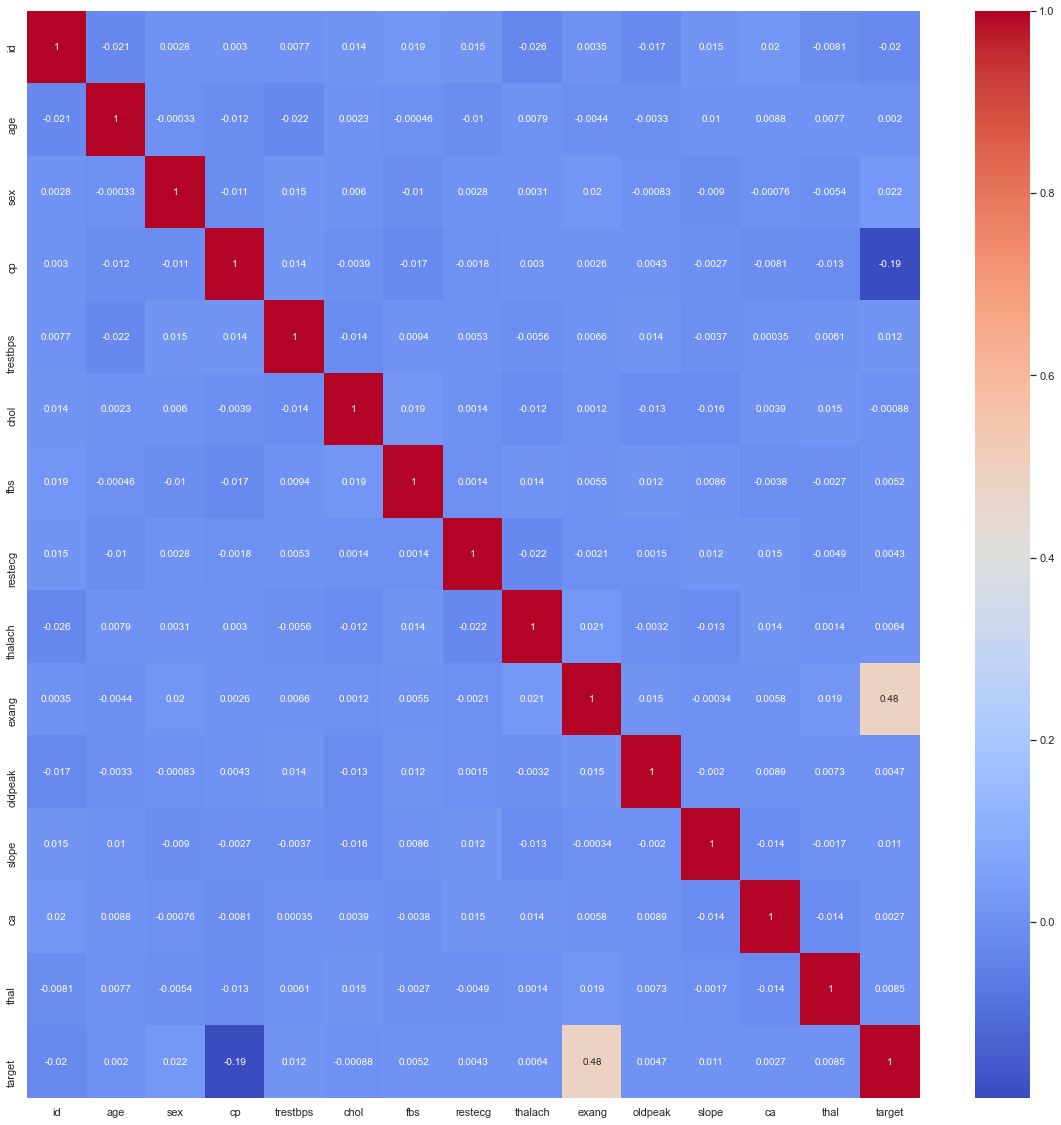

In [370]:
# check correlation

plt.figure(figsize=(20,20))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm')

In [371]:
# # expanding the categorical columns
# # ['cp', 'restecg', 'slope', 'ca', 'thal', 'target']

# train['cp'] = train['cp'].apply(lambda x: str(x))
# train['restecg'] = train['restecg'].apply(lambda x: str(x))
# train['slope'] = train['slope'].apply(lambda x: str(x))
# train['ca'] = train['ca'].apply(lambda x: str(x))
# train['thal'] = train['thal'].apply(lambda x: str(x))

# test['cp'] = test['cp'].apply(lambda x: str(x))
# test['restecg'] = test['restecg'].apply(lambda x: str(x))
# test['slope'] = test['slope'].apply(lambda x: str(x))
# test['ca'] = test['ca'].apply(lambda x: str(x))
# test['thal'] = test['thal'].apply(lambda x: str(x))

# train.info()

In [372]:
# # expanding the categorical columns

# train = pd.get_dummies(train)
# test = pd.get_dummies(test)

# train.info()

In [373]:
# exploring categorical columns

cat = ['cp', 'restecg', 'slope', 'ca', 'thal']

for x in cat:
    print('')
    print(train[train['target']==1][x].value_counts())
    print('')


0    1738
3    1388
1    1319
2    1306
Name: cp, dtype: int64


2    1958
1    1908
0    1885
Name: restecg, dtype: int64


1    1925
0    1913
2    1913
Name: slope, dtype: int64


4    1194
2    1193
1    1127
3    1120
0    1117
Name: ca, dtype: int64


1    1455
3    1449
0    1432
2    1415
Name: thal, dtype: int64



In [374]:
train.describe()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,7087.000000,7087.000000,7087.000000,7087.000000,7087.000000,7087.000000,7087.000000,7087.000000,7087.000000,7087.000000,7087.000000,7087.000000,7087.000000,7087.000000,7087.000000
mean,50520.455341,53.161987,0.498660,1.511923,147.749259,343.852265,0.499365,1.011006,136.083251,0.500494,3.126556,0.995485,2.023705,1.496402,0.811486
std,23091.461196,14.217069,0.500033,1.118239,31.019531,127.795534,0.500035,0.816595,38.022627,0.500035,1.784760,0.817175,1.411018,1.118296,0.391150
min,10019.000000,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30629.000000,41.000000,0.000000,1.000000,121.000000,231.000000,0.000000,0.000000,103.000000,0.000000,1.600000,0.000000,1.000000,0.000000,1.000000
50%,50872.000000,53.000000,0.000000,2.000000,148.000000,344.000000,0.000000,1.000000,136.000000,1.000000,3.100000,1.000000,2.000000,1.000000,1.000000
75%,70511.000000,66.000000,1.000000,3.000000,175.000000,453.000000,1.000000,2.000000,169.000000,1.000000,4.700000,2.000000,3.000000,2.000000,1.000000
max,89991.000000,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [375]:
train[train['target']==1].describe()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,5751.000000,5751.000000,5751.000000,5751.000000,5751.000000,5751.000000,5751.000000,5751.000000,5751.000000,5751.000000,5751.000000,5751.000000,5751.000000,5751.000000,5751.0
mean,50293.620066,53.175622,0.503912,1.407581,147.933751,343.798296,0.500609,1.012693,136.201009,0.616762,3.130638,1.000000,2.025561,1.500956,1.0
std,23193.997469,14.224257,0.500028,1.152738,31.153320,127.658249,0.500043,0.817427,38.091034,0.486218,1.782279,0.815715,1.413429,1.118986,0.0
min,10019.000000,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,30270.000000,41.000000,0.000000,0.000000,121.000000,231.000000,0.000000,0.000000,103.000000,0.000000,1.600000,0.000000,1.000000,1.000000,1.0
50%,50550.000000,53.000000,1.000000,1.000000,149.000000,344.000000,1.000000,1.000000,136.000000,1.000000,3.100000,1.000000,2.000000,1.000000,1.0
75%,70551.000000,66.000000,1.000000,2.000000,175.000000,452.500000,1.000000,2.000000,169.000000,1.000000,4.700000,2.000000,3.000000,3.000000,1.0
max,89991.000000,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.0


In [376]:
# # Fixing continuous variables

# cont = ['trestbps', 'chol', 'thalach','oldpeak']

# train['trestbps'] = train['trestbps'].apply(lambda x: x/1000)
# train['chol'] = train['chol'].apply(lambda x: x/1000)
# train['thalach'] = train['thalach'].apply(lambda x: x/1000)
# train['oldpeak'] = train['oldpeak'].apply(lambda x: x/10)


# test['trestbps'] = test['trestbps'].apply(lambda x: x/1000)
# test['chol'] = test['chol'].apply(lambda x: x/1000)
# test['thalach'] = test['thalach'].apply(lambda x: x/1000)
# test['oldpeak'] = test['oldpeak'].apply(lambda x: x/10)


# train.info()

# There are no duplicate rows as well as missing values

## We would start by dropping the clearly columns which are the, id, age and the sex

In [400]:
# Spliting the train data set

X = train.drop(['target', 'age', 'id'], axis=1).copy()
y = train['target'].copy()

test2 = test.drop(['target', 'age', 'id'], axis=1).copy()


In [401]:
X.shape, test2.shape

((7087, 12), (2913, 12))

In [407]:
# Model Building

# import ML libraries

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, classification_report, auc, roc_auc_score, accuracy_score
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold,StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from rgf.sklearn import RGFClassifier

# Hyper parameter tuning

from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer
from sklearn.feature_selection import RFECV

# Skopt functions
from skopt import BayesSearchCV
from skopt.callbacks import DeadlineStopper, VerboseCallback, DeltaXStopper
from skopt.space import Real, Categorical, Integer
from time import time

# ensemble
from sklearn.ensemble import VotingClassifier

In [408]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5, stratify=y)

In [396]:
# # RandomForest

# rf = RandomForestClassifier(random_state=42, class_weight='balanced', max_depth=10)
# rf.fit(X_train, y_train)
# predx = rf.predict(X_test)
# print(accuracy_score(y_test, predx))
# print(classification_report(y_test, predx))

In [382]:
# # RandomForest unbalanced

# rf = RandomForestClassifier(random_state=42, max_depth=10)
# rf.fit(X_train, y_train)
# predx = rf.predict(X_test)
# print(accuracy_score(y_test, predx))
# print(classification_report(y_test, predx))

In [443]:
# logistic regression

rf = LogisticRegression(max_iter=1000)
rf.fit(X_train, y_train)
predx = rf.predict(X_test)
print(accuracy_score(y_test, predx))
print(classification_report(y_test, predx))

0.8124118476727785
              precision    recall  f1-score   support

           0       0.50      0.31      0.39       267
           1       0.85      0.93      0.89      1151

    accuracy                           0.81      1418
   macro avg       0.68      0.62      0.64      1418
weighted avg       0.79      0.81      0.79      1418



In [384]:
# catboost classifier

rf = CatBoostClassifier(n_estimators=100, random_state=5)
rf.fit(X_train, y_train)
predx = rf.predict(X_test)
print(accuracy_score(y_test, predx))
print(classification_report(y_test, predx))

Learning rate set to 0.178518
0:	learn: 0.6030637	total: 25.4ms	remaining: 2.52s
1:	learn: 0.5376405	total: 28.2ms	remaining: 1.38s
2:	learn: 0.4823494	total: 30.3ms	remaining: 980ms
3:	learn: 0.4411120	total: 32.5ms	remaining: 781ms
4:	learn: 0.4107195	total: 35.4ms	remaining: 672ms
5:	learn: 0.3841191	total: 38.2ms	remaining: 598ms
6:	learn: 0.3657596	total: 41.7ms	remaining: 554ms
7:	learn: 0.3500279	total: 45.3ms	remaining: 521ms
8:	learn: 0.3364989	total: 47.9ms	remaining: 484ms
9:	learn: 0.3252690	total: 50.7ms	remaining: 457ms
10:	learn: 0.3164008	total: 56.1ms	remaining: 454ms
11:	learn: 0.3087438	total: 58.8ms	remaining: 431ms
12:	learn: 0.3027086	total: 61.5ms	remaining: 412ms
13:	learn: 0.2972354	total: 64.3ms	remaining: 395ms
14:	learn: 0.2917351	total: 71.8ms	remaining: 407ms
15:	learn: 0.2899038	total: 75.5ms	remaining: 396ms
16:	learn: 0.2861646	total: 78.9ms	remaining: 385ms
17:	learn: 0.2825005	total: 84.7ms	remaining: 386ms
18:	learn: 0.2797549	total: 87.4ms	remaining

In [441]:
# xgboost classifier

rf = XGBClassifier(n_estimators=100, random_state=5)
rf.fit(X_train, y_train)
predx = rf.predict(X_test)
print(accuracy_score(y_test, predx))
print(classification_report(y_test, predx))

0.808885754583921
              precision    recall  f1-score   support

           0       0.49      0.39      0.44       267
           1       0.87      0.91      0.88      1151

    accuracy                           0.81      1418
   macro avg       0.68      0.65      0.66      1418
weighted avg       0.79      0.81      0.80      1418



In [386]:
# # lgbm classifier

# rf = LGBMClassifier(n_estimators=100, random_state=5, max_depth=10)
# rf.fit(X_train, y_train)
# predx = rf.predict(X_test)
# print(accuracy_score(y_test, predx))
# print(classification_report(y_test, predx))

In [387]:
# # RGF classifier

# rf = RGFClassifier(max_leaf =50, n_jobs=-1, verbose=5, algorithm='RGF_Sib', l2=0.1)
# rf.fit(X_train, y_train)
# predx = rf.predict(X_test)
# print(accuracy_score(y_test, predx))
# print(classification_report(y_test, predx))

In [445]:
# SVC classifier

rf = SVC(random_state=5, kernel='sigmoid')
rf.fit(X_train, y_train)
predx = rf.predict(X_test)
print(accuracy_score(y_test, predx))
print(classification_report(y_test, predx))

0.689703808180536
              precision    recall  f1-score   support

           0       0.16      0.15      0.16       267
           1       0.81      0.81      0.81      1151

    accuracy                           0.69      1418
   macro avg       0.48      0.48      0.48      1418
weighted avg       0.68      0.69      0.69      1418



In [389]:
# GradientBoostingClassifier

rf = GradientBoostingClassifier(random_state=5, max_depth=10)
rf.fit(X_train, y_train)
predx = rf.predict(X_test)
print(accuracy_score(y_test, predx))
print(classification_report(y_test, predx))

0.8110014104372355
              precision    recall  f1-score   support

           0       0.50      0.44      0.47       267
           1       0.87      0.90      0.89      1151

    accuracy                           0.81      1418
   macro avg       0.69      0.67      0.68      1418
weighted avg       0.80      0.81      0.81      1418



In [434]:
# NB Classifier

rf = GaussianNB()
rf.fit(X_train, y_train)
predx = rf.predict(X_test)
print(accuracy_score(y_test, predx))
print(classification_report(y_test, predx))

0.68688293370945
              precision    recall  f1-score   support

           0       0.38      1.00      0.55       267
           1       1.00      0.61      0.76      1151

    accuracy                           0.69      1418
   macro avg       0.69      0.81      0.65      1418
weighted avg       0.88      0.69      0.72      1418



In [448]:
# KNN Classifier
rf = KNeighborsClassifier(n_neighbors=2)
rf.fit(X_train, y_train)
predx = rf.predict(X_test)
print(accuracy_score(y_test, predx))
print(classification_report(y_test, predx))

0.6198871650211566
              precision    recall  f1-score   support

           0       0.21      0.36      0.26       267
           1       0.82      0.68      0.74      1151

    accuracy                           0.62      1418
   macro avg       0.51      0.52      0.50      1418
weighted avg       0.71      0.62      0.65      1418



In [454]:
# Voting Clasifier

def model_score(model):
    rtr = model.predict(X_train)
    rte = model.predict(X_test)
    
    train_acc = accuracy_score(y_train, rtr)
    test_acc = accuracy_score(y_test, rte)
    print('Training data ACC: {} \t Validation ACC: {}'.format(train_acc, test_acc))
    return test_acc

xg = XGBClassifier(n_estimators=100, random_state=5, max_depth=3)
kn = KNeighborsClassifier(n_neighbors=2)
gb = GaussianNB()
rf = RandomForestClassifier(random_state=42, max_depth=10)
lg = LogisticRegression(max_iter=1000)
svc = SVC(random_state=5, kernel='sigmoid')



rf = VotingClassifier(estimators=[('xg', xg), ('kn', kn), ('gb', gb), ('rf', rf), ('lg', lg), ('svc', svc)], n_jobs=-1, verbose=True, voting='hard')

kf = StratifiedKFold(n_splits=5, shuffle=False)
scores, preds = [], []
j = 1

#ct = CatBoostClassifier(n_estimators = 100, eval_metric='AUC', random_state=5, thread_count=-1, max_depth=5, use_best_model=True)

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    rf.fit(X_train, y_train)

    print(f'Split trained: {j}')

    score = model_score(rf)
    pred = rf.predict(test2)  # prediction of the test data
    
    scores.append(score)
    preds.append(pred)
    j += 1

print(np.mean(scores))

predict = np.mean(preds, axis=0)

Split trained: 1
Training data ACC: 0.9296172164402893 	 Validation ACC: 0.7954866008462623
Split trained: 2
Training data ACC: 0.9326159816546128 	 Validation ACC: 0.8173483779971791
Split trained: 3
Training data ACC: 0.9239858906525573 	 Validation ACC: 0.7854622441778405
Split trained: 4
Training data ACC: 0.9312169312169312 	 Validation ACC: 0.8038108680310515
Split trained: 5
Training data ACC: 0.9289241622574956 	 Validation ACC: 0.8052223006351447
0.8014660783374955


In [455]:
# Voting Clasifier 2

def model_score(model):
    rtr = model.predict(X_train)
    rte = model.predict(X_test)
    
    train_acc = accuracy_score(y_train, rtr)
    test_acc = accuracy_score(y_test, rte)
    print('Training data ACC: {} \t Validation ACC: {}'.format(train_acc, test_acc))
    return test_acc

xg = XGBClassifier(n_estimators=100, random_state=5, max_depth=3)
cb = CatBoostClassifier(n_estimators=100, random_state=5)
gb = GradientBoostingClassifier(random_state=5, max_depth=10)



rf = VotingClassifier(estimators=[('xg', xg), ('cb', cb), ('gb', gb)], n_jobs=-1, verbose=True, voting='hard')

kf = StratifiedKFold(n_splits=5, shuffle=False)
scores, preds = [], []
j = 1

#ct = CatBoostClassifier(n_estimators = 100, eval_metric='AUC', random_state=5, thread_count=-1, max_depth=5, use_best_model=True)

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    rf.fit(X_train, y_train)

    print(f'Split trained: {j}')

    score = model_score(rf)
    pred = rf.predict(test2)  # prediction of the test data
    
    scores.append(score)
    preds.append(pred)
    j += 1

print(np.mean(scores))

predict = np.mean(preds, axis=0)

Split trained: 1
Training data ACC: 0.9431998588816369 	 Validation ACC: 0.8025387870239774
Split trained: 2
Training data ACC: 0.9412594813900159 	 Validation ACC: 0.8124118476727785
Split trained: 3
Training data ACC: 0.9393298059964726 	 Validation ACC: 0.8073394495412844
Split trained: 4
Training data ACC: 0.946384479717813 	 Validation ACC: 0.7946365561044461
Split trained: 5
Training data ACC: 0.9386243386243386 	 Validation ACC: 0.8087508821453776
0.8051355044975729


In [404]:
# full training data

# xgboost classifier

rf = XGBClassifier(n_estimators=100, random_state=5, max_depth=3)
rf.fit(X, y)

XGBClassifier(random_state=5)

In [320]:
# full training data

# catboost classifier

rf = CatBoostClassifier(n_estimators=100, random_state=5)
rf.fit(X, y)

Learning rate set to 0.196373
0:	learn: 0.5920934	total: 9.02ms	remaining: 893ms
1:	learn: 0.5222462	total: 11.8ms	remaining: 579ms
2:	learn: 0.4692691	total: 14.7ms	remaining: 475ms
3:	learn: 0.4265802	total: 17ms	remaining: 408ms
4:	learn: 0.3940065	total: 21.3ms	remaining: 404ms
5:	learn: 0.3706166	total: 25.1ms	remaining: 394ms
6:	learn: 0.3525776	total: 31.7ms	remaining: 421ms
7:	learn: 0.3363384	total: 43.9ms	remaining: 505ms
8:	learn: 0.3238303	total: 53.1ms	remaining: 536ms
9:	learn: 0.3134439	total: 56.6ms	remaining: 509ms
10:	learn: 0.3053941	total: 59.7ms	remaining: 483ms
11:	learn: 0.2981114	total: 64.7ms	remaining: 474ms
12:	learn: 0.2956227	total: 68.1ms	remaining: 456ms
13:	learn: 0.2895241	total: 73.6ms	remaining: 452ms
14:	learn: 0.2857567	total: 82.5ms	remaining: 467ms
15:	learn: 0.2820575	total: 85.5ms	remaining: 449ms
16:	learn: 0.2792682	total: 89.1ms	remaining: 435ms
17:	learn: 0.2758762	total: 96.8ms	remaining: 441ms
18:	learn: 0.2731946	total: 99.8ms	remaining: 

In [138]:
# full training data

# gbc classifier

rf = GradientBoostingClassifier(random_state=5, max_depth=10)
rf.fit(X, y)

GradientBoostingClassifier(max_depth=10, random_state=5)

In [184]:
# RFECV

kf = StratifiedKFold(n_splits=5, shuffle=False)

rf = RFECV(XGBClassifier(n_estimators=100, random_state=5, max_depth=3), cv=kf, n_jobs=1, scoring='accuracy', min_features_to_select=2, verbose=5)

rf.fit(X, y)

Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.

RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=XGBClassifier(random_state=5), min_features_to_select=2,
      n_jobs=1, scoring='accuracy', verbose=5)

In [185]:
rf.support_

array([False,  True, False, False,  True,  True,  True, False, False,
        True, False, False,  True,  True, False,  True, False,  True,
       False, False, False, False,  True, False, False])

In [187]:
rf.n_features_

10

In [405]:
X.columns

Index(['sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [406]:
# submission

predict  = rf.predict(test2)

test3 = test.copy()

test3['target'] = predict


submit = test3[['id', 'target']].copy()

submit.to_csv('Submission34.csv', index=False)

In [458]:
test = pd.read_csv('Test.csv')
test3 = test.copy()
submit = test3[['id', 'target']].copy()

submit.to_csv('Submission35.csv', index=False)

In [459]:
submit

,id,target
0,37677,0
1,27603,0
2,66786,0
3,45438,1
4,73200,1
...,...,...
2908,53076,0
2909,28491,1
2910,45585,1
2911,23388,1
